This script aims to devise a clustering method to impute cabins/groups of cabins for the passengers of the titanic as a means to increase the precision of the subsequent classification. This is part of the feature engineering procedure. 

In [72]:
## Importing the libraries.

# Basic libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import plotly.express as px

# Clustering Libraries
from sklearn.cluster import (
    DBSCAN,
    KMeans,
    AgglomerativeClustering,
    MeanShift,
    AffinityPropagation,
)

data = pd.read_csv('train.csv', index_col = 0)
data.head(50)

y = data['Survived']

scaler = StandardScaler()

standardized_columns = ['Age', 'Fare']

data[standardized_columns] = scaler.fit_transform(data[standardized_columns])

data = data.drop(['Ticket', 'Name', 'Embarked', 'Parch', 'SibSp'], axis = 1)
data = data.dropna(subset = ['Cabin'])

original_cabins = data['Cabin']
data['Cabin'] = data['Cabin'].apply(lambda x: x.split(' ')[0][0])

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data.head()

label_encoder = LabelEncoder()

unique_cabins = data['Cabin'].unique()
print(data['Cabin'].value_counts())


data['Cabin'] = label_encoder.fit_transform(data['Cabin'])


data['Age'].fillna(data['Age'].mean(), inplace= True)

print(data[['Age', 'Fare']])

print(data.isna().sum())

print(data.head(20))

X = data.copy()
print(X.isna().sum())

# Standardizing the numeric variables 'Age' and 'Fare'
""" scaler = StandardScaler()

standardized_columns = ['Age', 'Fare']

X[standardized_columns] = scaler.fit_transform(X[standardized_columns]) """

X.head()



C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64
                  Age      Fare
PassengerId                    
2            0.571831  0.786845
4            0.365167  0.420730
7            1.674039  0.395814
11          -1.770360 -0.312172
12           1.949591 -0.113846
...               ...       ...
872          1.191823  0.409741
873          0.227391 -0.547748
880          1.811815  1.025945
888         -0.737041 -0.044381
890         -0.254825 -0.044381

[204 rows x 2 columns]
Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Cabin       0
dtype: int64
             Survived  Pclass  Sex       Age      Fare  Cabin
PassengerId                                                  
2                   1       1    1  0.571831  0.786845      2
4                   1       1    1  0.365167  0.420730      2
7                   0       1    0  1.674039  0.395814      4
11                  1       3    1 -1.770360 -0.312172      6
1

,Survived,Pclass,Sex,Age,Fare,Cabin
PassengerId,,,,,,
2,1,1,1,0.571831,0.786845,2
4,1,1,1,0.365167,0.420730,2
7,0,1,0,1.674039,0.395814,4
11,1,3,1,-1.770360,-0.312172,6
12,1,1,1,1.949591,-0.113846,2


             Survived  Pclass  Sex       Age      Fare  Cabin
PassengerId                                                  
2                   1       1    1  0.571831  0.786845      2
4                   1       1    1  0.365167  0.420730      2
7                   0       1    0  1.674039  0.395814      4
11                  1       3    1 -1.770360 -0.312172      6
12                  1       1    1  1.949591 -0.113846      2
...               ...     ...  ...       ...       ...    ...
872                 1       1    1  1.191823  0.409741      3
873                 0       1    0  0.227391 -0.547748      1
880                 1       1    1  1.811815  1.025945      2
888                 1       1    1 -0.737041 -0.044381      1
890                 1       1    0 -0.254825 -0.044381      2

[204 rows x 6 columns]
Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin'], dtype='object')


c:\Users\hauti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\hauti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\hauti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\hauti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

<AxesSubplot:>

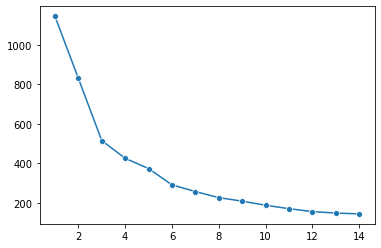

In [73]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

## Building a KMeans clustering operation
print(X)
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)
print(X.columns)

# Initialising the KMeans algorithm and using the elbow method to 
# determine the optimal number of clusters.

inertia = []

for i in range(1,15):
    KM = KMeans(init = 'k-means++', n_clusters = i, random_state = 42)
    train_results = KM.fit(X_pca)
    inertia.append(KM.inertia_)

plt.figure()
sns.lineplot(x = list(range(1,15)), y = inertia, marker = 'o')


In [74]:
# 
KM = KMeans(init = 'k-means++', n_clusters = 2, random_state = 42)
train_results = KM.fit(X_pca)

print(X_pca)


print(train_results)
print(len(KM.labels_), KM.labels_)
data['cluster'] = KM.labels_
print(data.head(20))

data_labels = label_encoder.inverse_transform(data['Cabin'])

data['CabinName'] = data_labels
print(data.head(20))

# Creating a crosstab

corrtable = pd.crosstab(data['cluster'], data['CabinName'], normalize=True)
# Now, normalize the crosstab per CabinName group
corrtable_normalized = corrtable.div(corrtable.sum(axis=0), axis=1)
print(corrtable_normalized)


[[-2.62771737e-01 -3.01205464e-01 -8.86563120e-02]
 [ 9.18175530e-04 -4.58466215e-01 -3.71551269e-01]
 [ 1.36732849e+00 -2.81971180e-02  1.65320086e+00]
 [ 3.79794321e+00  2.55448842e+00 -1.15768278e+00]
 [ 2.76617791e-01 -1.47722626e+00  8.82149815e-01]
 [ 1.45439690e+00 -3.56992597e-01 -2.98867453e-01]
 [-1.11695517e+00 -1.77714045e+00 -1.54556924e+00]
 [-2.81402272e+00  2.62865636e+00 -2.24463582e-02]
 [-1.99477686e+00  1.78857931e-01 -1.60579898e-01]
 [ 3.17078687e-01  4.57205548e-02  9.65673868e-01]
 [-9.14111142e-01 -1.98252419e+00  1.31456632e+00]
 [ 2.50100690e-01 -8.20861340e-01 -3.59604612e-01]
 [-1.08259520e+00 -7.75333717e-01 -3.95268542e-01]
 [-4.32665507e-01 -5.27008526e-01  5.70297496e-01]
 [ 2.89842754e+00  1.03812166e+00  3.38163968e-02]
 [ 3.16704260e+00  1.04950344e+00 -1.18305264e-01]
 [-2.85681878e+00  2.70083971e+00  5.54492586e-02]
 [ 1.27035713e+00  3.27195909e-01  1.21755949e+00]
 [-1.25896500e+00 -3.11267476e+00  1.17444855e+00]
 [ 6.14839523e-01  5.13266744e-

c:\Users\hauti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [75]:



data_labels = label_encoder.inverse_transform(data['Cabin'])
clusters = data['cluster'].reset_index(drop = True)
cabins = data['Cabin'].reset_index(drop = True)
print(clusters)

# Step 5: Create a DataFrame for the PCA results and cluster centers
pca_df = pd.DataFrame(X_pca, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
pca_df['cluster'] = clusters
pca_df['Cabin'] = cabins

print(pca_df.head())




0      0
1      0
2      0
3      0
4      0
      ..
199    0
200    0
201    0
202    0
203    0
Name: cluster, Length: 204, dtype: int32
   PCA Component 1  PCA Component 2  PCA Component 3  cluster  Cabin
0        -0.262772        -0.301205        -0.088656        0      2
1         0.000918        -0.458466        -0.371551        0      2
2         1.367328        -0.028197         1.653201        0      4
3         3.797943         2.554488        -1.157683        0      6
4         0.276618        -1.477226         0.882150        0      2


In [76]:
import plotly.graph_objects as go
from scipy.spatial import ConvexHull

center = KM.cluster_centers_

# Create a DataFrame for the cluster centers
centers_df = pd.DataFrame(center, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
centers_df['cluster'] = range(len(center))  # Add a cluster index for center points



# Create scatter plot
scatter = go.Scatter3d(
    x=pca_df['PCA Component 1'],
    y=pca_df['PCA Component 2'],
    z=pca_df['PCA Component 3'],
    mode='markers',
    marker=dict(
        size=5,
        color=pca_df['Cabin'],  # Color by cluster
        colorscale='Viridis',  # Customize color scale
        opacity=0.8
    ),
    text=pca_df['Cabin'],  # Tooltip showing the cabin name
    name='Clusters'
)

# Create a surface for each cluster (using Convex Hull for simplicity)
cluster_surfaces = []

# Loop through each cluster and create a convex hull surface
for cluster_id in pca_df['cluster'].unique():
    cluster_points = pca_df[pca_df['cluster'] == cluster_id]
    points = cluster_points[['PCA Component 1', 'PCA Component 2', 'PCA Component 3']].values
    
    # Convex Hull to wrap the points in each cluster
    hull = ConvexHull(points)
    
    # Extract the vertices of the convex hull
    x_hull = points[hull.vertices, 0]
    y_hull = points[hull.vertices, 1]
    z_hull = points[hull.vertices, 2]
    
    # Create a surface for this convex hull
    cluster_surface = go.Mesh3d(
        x=x_hull,
        y=y_hull,
        z=z_hull,
        opacity=0.3,  # Surface opacity
        color=f'rgba({cluster_id * 50}, {cluster_id * 80}, {cluster_id * 100}, 0.5)',  # Cluster-based color
        name=f'Cluster {cluster_id} Surface'
    )
    
    cluster_surfaces.append(cluster_surface)

cluster_centers = go.Scatter3d(
    x= center[:, 0],
    y= center[:, 1],
    z= center[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color='red',  # Distinct color for cluster centers
        symbol='diamond',  # Use a different shape for cluster centers
        opacity=1.0
    ),
    name='Cluster Centers'
)

# Create the final plot with scatter and surfaces
fig = go.Figure(data=[scatter, cluster_centers] + cluster_surfaces)

# Set layout
fig.update_layout(
    title="3D Scatter with Cluster Surfaces",
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3'
    ),
    showlegend=True
)

# Show plot
fig.show()